In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
%matplotlib inline
#sns.set_style('whitegrid')
sns.set_style('darkgrid')

In [10]:
data = pd.read_csv('data', index_col=0)

In [11]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [7]:
#data.info()

In [8]:
#data.describe()

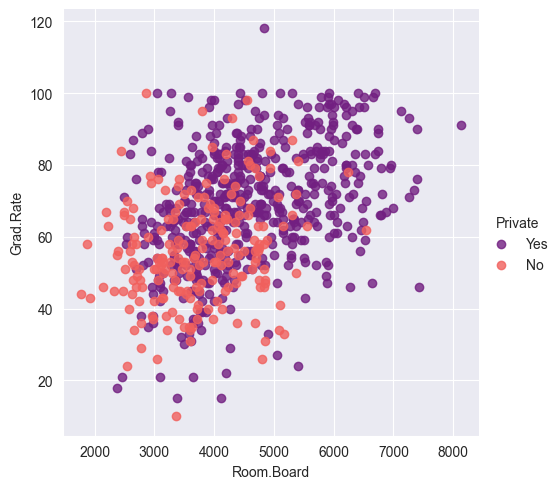

In [18]:
sns.lmplot(x='Room.Board', y='Grad.Rate', data=data, hue='Private', palette='magma', aspect=1, fit_reg=False)

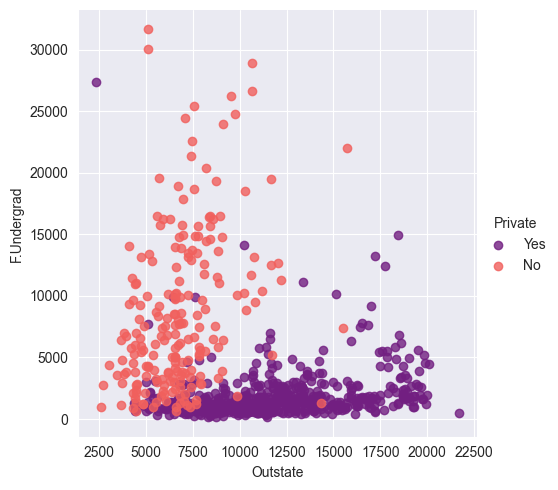

In [19]:
sns.lmplot(x='Outstate', y='F.Undergrad', data=data, hue='Private', palette='magma', aspect=1, fit_reg=False)

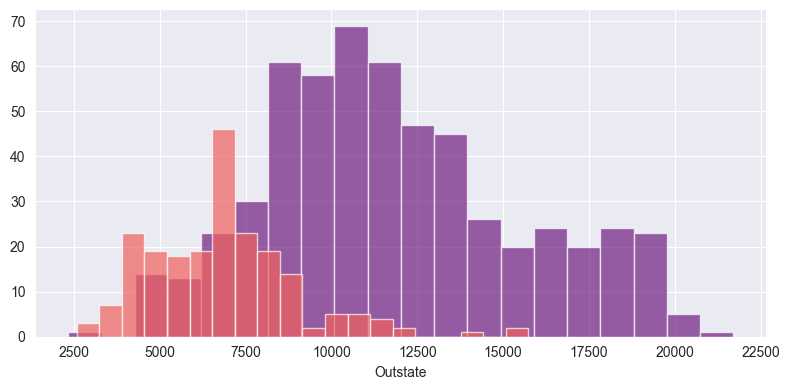

In [29]:
g = sns.FacetGrid(data, hue="Private", palette='magma', height=4, aspect=2)
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

**Create a similar histogram for the Grad.Rate column.**

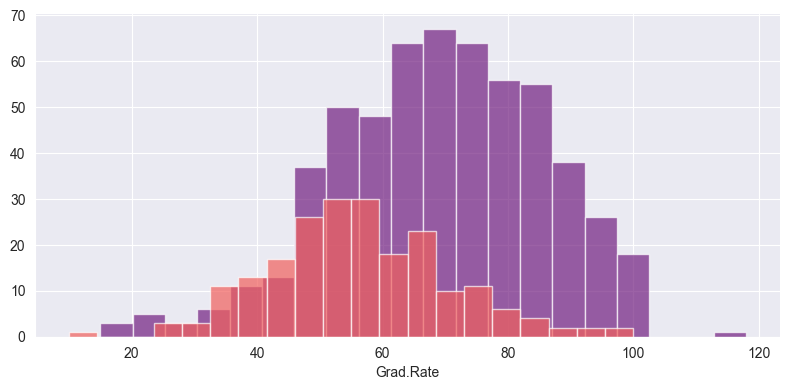

In [30]:
g = sns.FacetGrid(data, hue="Private", palette='magma', height=4, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

In [31]:
data[data['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [34]:
data['Grad.Rate']['Cazenovia College'] = 100

C:\Users\jagwo\AppData\Local\Temp\ipykernel_11144\4163042839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grad.Rate']['Cazenovia College'] = 100


In [35]:
data[data['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


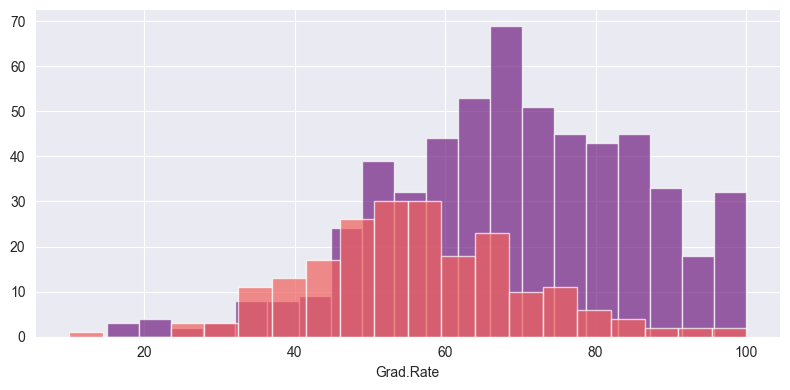

In [36]:
g = sns.FacetGrid(data, hue="Private", palette='magma', height=4, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

In [37]:
from sklearn.cluster import KMeans

In [38]:
k_means = KMeans(n_clusters=2)

In [39]:
k_means.fit(data.drop('Private', axis=1))

C:\Users\jagwo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [40]:
k_means.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

In [42]:
def converter(cluster):
    if cluster == 'Yes':
        return 1
    else:
        return 0

In [43]:
data['Cluster'] = data['Private'].apply(converter)

In [44]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [45]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(data['Cluster'], k_means.labels_))
print(classification_report(data['Cluster'], k_means.labels_))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

